In [36]:
import numpy as np
import tifffile as tf
import matplotlib.pyplot as plt
import glob
from scipy import ndimage
# from scipy import signal
# from roipoly import MultiRoi
# import imregpoc
# import mpld3
# from skimage import feature
# from skimage import draw

# def getROI(roi, im):
#     data=np.zeros((len(im)))
#     for i in range(len(im)):
#         data[i]=ndimage.mean(im[i,:,:],labels=roi)
#     return data

# def AOIselector(imageIn):
#     ### imagIn expected to be single frame###
#     %matplotlib 
#     plt.imshow(imageIn)
#     plt.show()
#     my_rois = MultiRoi(roi_names=['bulb1', 'bulb2'])
#     %matplotlib inline

#     BulbMask = my_rois.rois['bulb1'].get_mask(imageIn)
#     BulbMask+=my_rois.rois['bulb2'].get_mask(imageIn)
#     return BulbMask

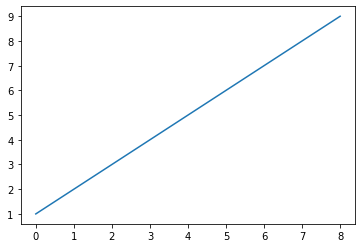

In [8]:
path='Z:/Data/Mark/CS2 Experiments/OMMI/Clear Skull/210820_VGxGC_ID018047/Pre IsoA Habituation/*.txt' # * is a wildcard 

files=glob.glob(path)

## check file names are sequenctial
fileNums=[]
for data in files:
    fileNums.append(int(data[-7:-4]))

plt.plot(fileNums)
del fileNums, data

In [52]:
def demix(files,pre,post):
    reds = []
    greens = []
    blues = []
    for file in files:
        print(file)
        txt = np.loadtxt(file)
#         for im in imgs:
#             #loop over tife fileS corresponding to that txt
        im = tf.imread(file[:-4]+'0001.tif') # get corresponding tiff file
        channel = txt[:im.shape[0],1];  ## assuming the longer txt file is due to run on at end, so crop it off
        valve = txt[:im.shape[0],3];

        redframes = np.argwhere(channel==0)[:,0]
        greenframes = np.argwhere(channel==1)[:,0]
        blueframes = np.argwhere(channel==2)[:,0]

        redValve = valve[redframes]
        greenValve = valve[greenframes]
        blueValve = valve[blueframes]

        redOn = np.argwhere(np.diff(redValve)==1)[0,0]
        greenOn = np.argwhere(np.diff(greenValve)==1)[0,0]
        blueOn = np.argwhere(np.diff(blueValve)==1)[0,0]

        red = im[redframes,:,:]
        green = im[greenframes,:,:]
        blue = im[blueframes,:,:]

        reds.append(red[redOn-pre:redOn+post,:,:])
        greens.append(green[greenOn-pre:greenOn+post,:,:])
        blues.append(blue[blueOn-pre:blueOn+post,:,:])
    return np.concatenate(reds,axis=0),np.concatenate(greens,axis=0),np.concatenate(blues,axis=0), len(files),pre+post


def getResponseImage(data,odour,pre,stim,order,num_stim,seg_len):
    Responses=[]
    for i in range(num_stim):
        if order[i]==stim:
            seg = data[(i*seg_len):(i*seg_len)+seg_len:,:]
            base = np.mean(seg[0:pre,:,:],axis=0)
            response = np.mean(seg[pre:150,:,:],axis=0)
            Responses.append(response-base)
        ResponseStack=np.stack(Responses, axis=0)
    return ResponseStack
    
def bandPass(data,lp,hp):
    a = ndimage.gaussian_filter(data,lp)
    b = ndimage.gaussian_filter(a,hp)
    return a-b


In [13]:
red, green, blue, num_stim, seg_len = demix(files,100,500)

Z:/Data/Mark/CS2 Experiments/OMMI/Clear Skull/210820_VGxGC_ID018047/Pre IsoA Habituation\Pre IsoA Habituation_S001.txt
Z:/Data/Mark/CS2 Experiments/OMMI/Clear Skull/210820_VGxGC_ID018047/Pre IsoA Habituation\Pre IsoA Habituation_S002.txt
Z:/Data/Mark/CS2 Experiments/OMMI/Clear Skull/210820_VGxGC_ID018047/Pre IsoA Habituation\Pre IsoA Habituation_S003.txt
Z:/Data/Mark/CS2 Experiments/OMMI/Clear Skull/210820_VGxGC_ID018047/Pre IsoA Habituation\Pre IsoA Habituation_S004.txt
Z:/Data/Mark/CS2 Experiments/OMMI/Clear Skull/210820_VGxGC_ID018047/Pre IsoA Habituation\Pre IsoA Habituation_S005.txt
Z:/Data/Mark/CS2 Experiments/OMMI/Clear Skull/210820_VGxGC_ID018047/Pre IsoA Habituation\Pre IsoA Habituation_S006.txt
Z:/Data/Mark/CS2 Experiments/OMMI/Clear Skull/210820_VGxGC_ID018047/Pre IsoA Habituation\Pre IsoA Habituation_S007.txt
Z:/Data/Mark/CS2 Experiments/OMMI/Clear Skull/210820_VGxGC_ID018047/Pre IsoA Habituation\Pre IsoA Habituation_S008.txt
Z:/Data/Mark/CS2 Experiments/OMMI/Clear Skull/21

In [75]:
#Save as Tiff files
tf.imwrite('blues.tiff',blue)
tf.imwrite('reds.tiff',red)
tf.imwrite('greens.tiff',green)

## Seperate odours for each channel and get response images

In [56]:
order = [0]*9
resp = getResponseImage(blue,0,100,0,order,num_stim,seg_len)

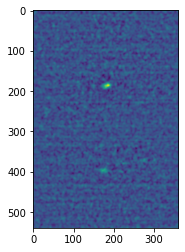

In [61]:
plt.imshow(bandPass(resp[5,:,:],2,11))

In [5]:
def demix(RGorB,pre,post):
    listofmovies = []
    for file in files:
        print(file)
        txt = np.loadtxt(file)
        im = tf.imread(file[:-4]+'0001.tif') # get corresponding tiff file
        channel = txt[:im.shape[0],1];  ## assuming the longer txt file is due to run on at end, so crop it off
        valve = txt[:im.shape[0],3];

        frames = np.argwhere(channel==RGorB)[:,0]
        
        Valveframes = valve[frames]
        
        stimOn = np.argwhere(np.diff(Valveframes)==1)[0,0]
        
        oneMovie = im[frames,:,:]
       
        listofmovies.append(oneMovie[stimOn-pre:stimOn+post,:,:])
    return np.concatenate(listofmovies,axis=0)

def getRGBmovies():
    red = demix(0,100,500)
    green = demix(1,100,500)
    blue = demix(2,100,500)
    return red, green, blue

red, green, blue = getRGBmovies()